This notebook uses matrix-based entropy [1, 2, 3] to analyze the "mutual information plane" of pretrained LLMs. 

Authors: Oscar Skean

## The Matrix-based Entropy Quantity


Matrix-based entropy was first proposed in [1]. It is a quantity which serves as a tractable surrogate for traditional Shannon's entropy. It's calculated using a kernel $\kappa$ on a batch of samples drawn from a distribution, without making explicit assumptions on what the true distribution is. Before introducing matrix-based entropy, it would be helpful to introduce its traditional information theory analogue called Renyi entropy, given by:

\begin{equation}
\tag{Renyi Entropy}
H_{\alpha}({P}) = \frac{1}{1-\alpha}\log{\sum_{i-1}^n p_i^{\alpha}}
\end{equation}

The Renyi entropy is a family of entropies parameterized by $\alpha$. Notable special cases are $\alpha=0$ (max-entropy), $\displaystyle \lim_{\alpha \rightarrow 1}$ (Shannon entropy), and $\alpha=2$ (collision entropy). A good writeup of Renyi entropy and the usecases of different choices of $\alpha$ is given in [4].

The definition of matrix-based entropy is given as follows.
Given a infinitely divisible kernel $\kappa$, we first construct a Gram matrix $\mathbf{K}_{\mathbf{X}} \in \mathbb{R}^{\textrm{N} \times \textrm{N}}$ consisting of all pairwise evaluations of the $N$ points in $\mathbf{X}$. The choice of $\kappa$ can be fairly flexible and could be a Gaussian kernel, linear kernel, Laplacian kernel, etc. Given $\mathbf{K}_{\mathbf{X}}$, the matrix-based entropy of order $\alpha>0$ is defined as:
\begin{equation}
\tag{Matrix-based Entropy}
S_{\alpha}\left(\mathbf{K}_{\mathbf{X}}\right) = \frac{1}{1-\alpha}\log{\left[\textrm{tr}{\left( \left( \frac{\mathbf{K}_{\mathbf{X}}}{\textrm{tr}(\mathbf{K}_{\mathbf{X}})} \right)^{\alpha}\right) }\right]},
\end{equation}

 Raising a matrix to the power of an arbitary real-valued $\alpha$ is in general difficult, so using the fact that $tr(A) = \sum_{i=1}^n \lambda_i(A)$ we can equivalently compute the above as:

\begin{equation}
\tag{Matrix-based Entropy}
S_{\alpha}\left(\mathbf{K}_{\mathbf{X}}\right) = \frac{1}{1-\alpha}\log{\left[ \sum_{i=1}^N \frac{\lambda_i(\mathbf{K}_{\mathbf{X}})}{\textrm{tr}(\mathbf{K}_{\mathbf{X}})} \right]},
\end{equation}

Notice how the matrix $\mathbf{K}_{\mathbf{X}}$ is normalized before being raised to the $\alpha$ power. This is so that the eigenvalues of $\mathbf{K}_{\mathbf{X}}$ all sum to one (as per $tr(A) = \sum_{i=1}^n \lambda_i(A)$), which is a necessary condition to treat the eigenvalues as a probability distribution. The eigenvalues of $\mathbf{K}_{\mathbf{X}}$ signify the variance of datapoints in a particular principal component direction. Therefore Equation 3 is reminescent to the so called $logdet$ entropy which captures how much "volume" a dataset occupies. However, there are many hyperparameters involved in the logdet computation to improve stability and, in my experience, the above equation is much more stable.

Like Shannon's entropy, the matrix-based entropy acts as a building block for more complex quantites such as joint entropy and mutual information. The definitions for several important matrix-based quantities are given below. Note that $\kappa$ can be any infinitely divisible kernel or corresponding covariance matrix. The following definitions are rigously introduced in [1] and gently summarized in [2].

### Matrix-based joint entropy
In the following, the $\circ$ operation is the Hadamard product aka elementwise product.
\begin{equation}
\tag{Joint Entropy}
S_{\alpha}\left(\mathbf{K}_{\mathbf{X}}, \mathbf{K}_{\mathbf{Y}} \right) = S_{\alpha}(\mathbf{K}_\mathbf{X} \circ \mathbf{K}_\mathbf{Y})
\end{equation}

### Matrix-based conditional entropy

\begin{equation}
\tag{Conditional Entropy}
S_{\alpha}(\mathbf{K}_\mathbf{X} \vert \mathbf{K}_\mathbf{Y}) = S_{\alpha}(\mathbf{K}_\mathbf{X} \circ \mathbf{K}_\mathbf{Y}) - S_{\alpha}(\mathbf{K}_\mathbf{Y}). 
\end{equation}

### Matrix-based mutual information

\begin{equation}
\tag{Mutual Information}
I_{\alpha}(\mathbf{K}_\mathbf{X} ; \mathbf{K}_\mathbf{Y}) =  S_{\alpha}(\mathbf{K}_\mathbf{X}) - S_{\alpha}(\mathbf{K}_\mathbf{X} \vert \mathbf{K}_\mathbf{Y}) = S_{\alpha}(\mathbf{K}_\mathbf{X}) +  S_{\alpha}(\mathbf{K}_\mathbf{Y}) - S_{\alpha}(\mathbf{K}_\mathbf{X} \circ \mathbf{K}_\mathbf{Y}), 
\end{equation}

## Random Interesting Properties

1. If $\alpha=2$, you can avoid explicit eigendecomposition with the Frobenius norm $||A||_F^2 = \sum_{i} \sum_{j} A_{ij}^2 = \sum_i^n \lambda_i(A)^2$. The $O(n^3)$ eigendecomposition on the rhs is reduced to a $O(n^2)$ sum of matrix elements in the middle. This property was exploited in the field of self-supervised learning in [6].

2. It must be emphasized the matrix-based entropy is NOT necessarily an estimator of Shannon's entropy of the data. It is a different measure of entropy that satisfies the axioms of entropy proposed by Renyi. However, it has been shown that if $\kappa$ is a Gaussian kernel with bandwidth $\sigma$, then as batch size $N \rightarrow \infty$ and $\sigma \rightarrow 0$, then matrix-based entropy is equal to Shannon's entropy. Loosely speaking, this follows from Parzen density estimation principles where the kernel evaluation is equal to the probability of a sample under these limit conditions.

## References

1. Giraldo, Luis Gonzalo Sanchez, Murali Rao, and Jose C. Principe. "Measures of entropy from data using infinitely divisible kernels.
2. Skean, Oscar, et al. "Dime: Maximizing mutual information by a difference of matrix-based entropies. 
3. Bach, Francis. "Information theory with kernel methods."
4. https://en.wikipedia.org/wiki/R%C3%A9nyi_entropy
5. Wei, et al. "Large Language Model Evaluation via Matrix Entropy"
6. Skean, Oscar, et al. "FroSSL: Frobenius Norm Minimization for
Efficient Multiview Self-Supervised Learning"

# Entropy of Dataset

This section is a reproduction of Figure 1 in [5]. This paper uses $\alpha=1$, which is equivalent to the Shannon entropy of the normalized covariance eigenvalues. It references [2] and [3], though the special case of $\alpha=1$ was discussed even earlier in [1].

Some of the following dataloader/model code is adapted from https://github.com/waltonfuture/Matrix-Entropy

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM, GPT2LMHeadModel, GPT2Model, AutoModel
import torch
import torch.nn.functional as F
import numpy as np
from utils.misc.model_dataloader_utils import get_model_path, get_dataloader, normalize, EleutherAI_sizes
import matplotlib.pyplot as plt
import tqdm
import repitl.matrix_itl as itl


device = "cuda:1"

In [2]:
import math

def compute_entropies_for_each_sentence(model, dataloader, alpha=1):
    entropy_dict = {
        'unnormalized': [],
        'logN_normalized': [],
        'logD_normalized': [],
        'logNlogD_normalized': [],
        'lengths': []
    }
    
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            hidden_states = outputs.hidden_states
            N, D = hidden_states[0].shape[1:]
            
            for layer_idx, hidden_state in enumerate(hidden_states):
                print(layer_idx, hidden_state.shape)

            last_hidden_state = normalize(outputs.last_hidden_state.squeeze())
            # (batch_size, num_words, embedding_dim)
            

            # be efficient here, XX^T and X^TX have the same eigenvalues and thus the same entropy
            if N > D:
                cov = last_hidden_state.T @ last_hidden_state
            else:
                cov = (last_hidden_state @ last_hidden_state.T)
            cov /= torch.trace(cov)
           
            entropy = itl.matrixAlphaEntropy(cov, alpha=alpha)
            entropy_dict['unnormalized'].append(entropy.item())
            entropy_dict['logN_normalized'].append(entropy.item() / math.log(N))
            entropy_dict['logD_normalized'].append(entropy.item() / math.log(D))
            entropy_dict['logNlogD_normalized'].append(entropy.item() / (math.log(N)*math.log(D)))
            entropy_dict['lengths'].append(N)

    return entropy_dict

Now we can compute the entropy of individual embedded sentences and get an estimate for the average entropy of a dataset

In [3]:
# load model
model_path = get_model_path("EleutherAI", "410m")
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModel.from_pretrained(model_path, output_hidden_states=True).to(device)

# train set entropies
dataloader = get_dataloader(tokenizer, "wikitext", split="train", num_samples=10)
train_entropies = compute_entropies_for_each_sentence(model, dataloader, alpha=1)

/home/AD/ofsk222/miniconda3/envs/information_plane/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

 25%|██▌       | 1/4 [00:01<00:04,  1.47s/it]

0 torch.Size([1, 233, 1024])
1 torch.Size([1, 233, 1024])
2 torch.Size([1, 233, 1024])
3 torch.Size([1, 233, 1024])
4 torch.Size([1, 233, 1024])
5 torch.Size([1, 233, 1024])
6 torch.Size([1, 233, 1024])
7 torch.Size([1, 233, 1024])
8 torch.Size([1, 233, 1024])
9 torch.Size([1, 233, 1024])
10 torch.Size([1, 233, 1024])
11 torch.Size([1, 233, 1024])
12 torch.Size([1, 233, 1024])
13 torch.Size([1, 233, 1024])
14 torch.Size([1, 233, 1024])
15 torch.Size([1, 233, 1024])
16 torch.Size([1, 233, 1024])
17 torch.Size([1, 233, 1024])
18 torch.Size([1, 233, 1024])
19 torch.Size([1, 233, 1024])
20 torch.Size([1, 233, 1024])
21 torch.Size([1, 233, 1024])
22 torch.Size([1, 233, 1024])
23 torch.Size([1, 233, 1024])
24 torch.Size([1, 233, 1024])
0 torch.Size([1, 118, 1024])
1 torch.Size([1, 118, 1024])
2 torch.Size([1, 118, 1024])
3 torch.Size([1, 118, 1024])
4 torch.Size([1, 118, 1024])
5 torch.Size([1, 118, 1024])
6 torch.Size([1, 118, 1024])
7 torch.Size([1, 118, 1024])
8 torch.Size([1, 118, 1024])

100%|██████████| 4/4 [00:01<00:00,  2.48it/s]


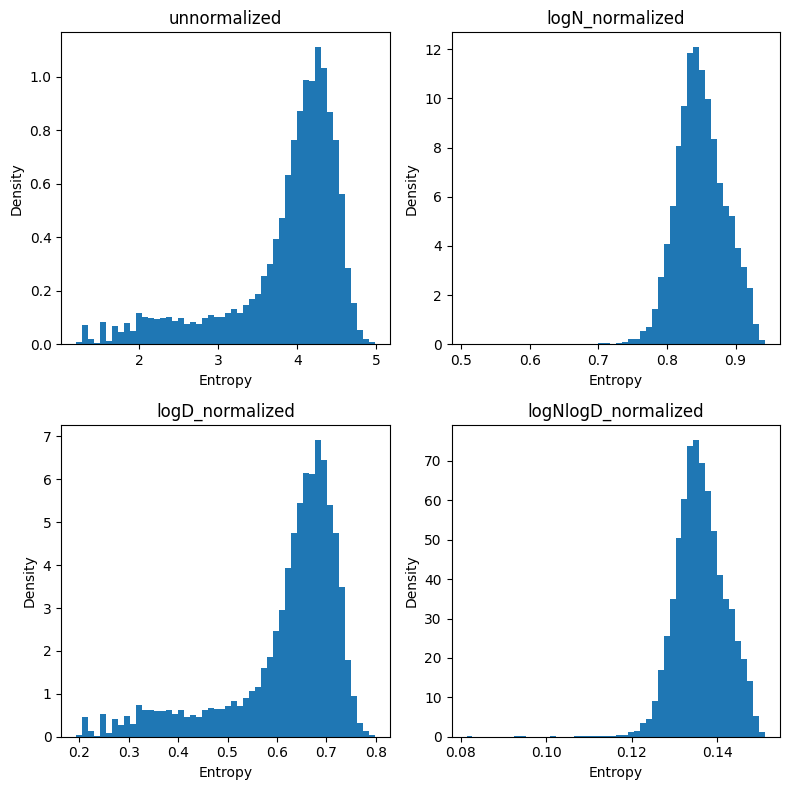

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))

for ax, key in zip(axes.flatten(), train_entropies.keys()):
    ax.hist(train_entropies[key], bins=50, density=True)
    ax.set_title(key)
    ax.set_xlabel("Entropy")
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

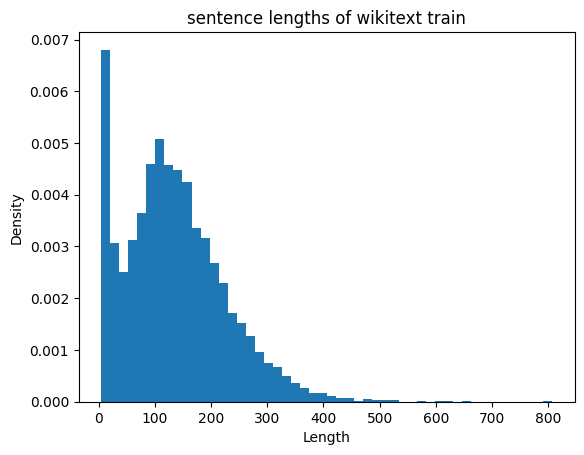

In [5]:
# plot lengths
fig, ax = plt.subplots()
ax.hist(train_entropies['lengths'], bins=50, density=True)
ax.set_title('sentence lengths of wikitext train')
ax.set_xlabel("Length")
ax.set_ylabel("Density")
plt.show()

# A look at the sentences with highest entropy

In [6]:
train_entropies['sentences'] = []
with torch.no_grad():
    for batch in tqdm.tqdm(dataloader):
        decoded_sentence = tokenizer.decode(batch['input_ids'][0])
        train_entropies['sentences'].append(decoded_sentence)

100%|██████████| 11621/11621 [00:05<00:00, 2185.33it/s]


In [7]:
# find 5 sentences with lowest logN normalized 
normalization_to_show = 'logN_normalized'

sorted_indices = sorted(range(len(train_entropies[normalization_to_show])), key=lambda x: train_entropies[normalization_to_show][x])


print("5 sentences with lowest logN normalized entropy")
for i in range(5):
    print(f"{train_entropies[normalization_to_show][sorted_indices[i]]:.2f} {train_entropies['sentences'][sorted_indices[i]]}")

print("5 sentences with highest logN normalized entropy")
for i in range(1, 6):
    print(f"{train_entropies[normalization_to_show][sorted_indices[-i]]:.2f} {train_entropies['sentences'][sorted_indices[-i]]}")

5 sentences with lowest logN normalized entropy
0.51  5 – Xe + – N ≡ C – CH 

0.59  Saprang is the youngest of 9 children of Lieutenant Colonel Sri ( Thai : <unk> กัลยาณมิตร ) and <unk> Kalayanamitr ( Thai : <unk> ็ <unk> ้ ว กัลยาณมิตร ). Sri was the eldest of the 8 children of Phraya <unk>, ruler ( Chao Muang ) of the northern border city of Tak. 

0.59  Smaller groups included the <unk> ( see <unk> ), <unk>, <unk>, <unk>, <unk>, <unk>, <unk>, Fir <unk>, <unk>, <unk>, <unk>, <unk>, <unk>, <unk>, <unk>, <unk>, Uí Maine, Uí <unk>. Many survived into late medieval times, others vanished as they became politically unimportant. 

0.63  includes the previous subspecies and synonyms <unk>, <unk>, <unk>, <unk>, <unk>, <unk>, <unk>, and <unk> 

0.64  R – C ≡ C – Xe +, where R is C 

5 sentences with highest logN normalized entropy
0.94  The font in St Andrew's Church, South Croydon 

0.94  When Peter has to search for his spiritual guide, it turns out to be Fonzie from Happy Days. 

0.94  Not

# Lets take a look at how entropy evolves as context length increases

Here I adjusting the context length of the dataset by truncating each sentence so that its resulting length is a fixed percentage of its full length. Specifically I use percentages ranging from 0.1 to 1.0, where at 0.1 the sentence is truncated to the first 10% of words, and at 1.0 the sentence is fully complete.

The goal here is to see how information content / entropy changes as we increase the length of sentences.

In [8]:


context_length_ratios = np.linspace(0.1, 1.0, 5)
context_length_entropies = []

for context_length_ratio in context_length_ratios:
    print(f"doing context length of {context_length_ratio}")
    dataset = get_dataloader(tokenizer, "wikitext", split="train", context_length_ratio=context_length_ratio, min_length=50, num_samples=25000)
    context_length_entropies.append(compute_entropies_for_each_sentence(model, dataset, alpha=1))

doing context length of 0.1


100%|██████████| 9429/9429 [01:00<00:00, 155.81it/s]


doing context length of 0.325


100%|██████████| 9429/9429 [01:07<00:00, 140.55it/s]


doing context length of 0.55


100%|██████████| 9429/9429 [01:14<00:00, 126.64it/s]


doing context length of 0.775


100%|██████████| 9429/9429 [01:38<00:00, 95.66it/s] 


doing context length of 1.0


100%|██████████| 9429/9429 [01:32<00:00, 102.27it/s]


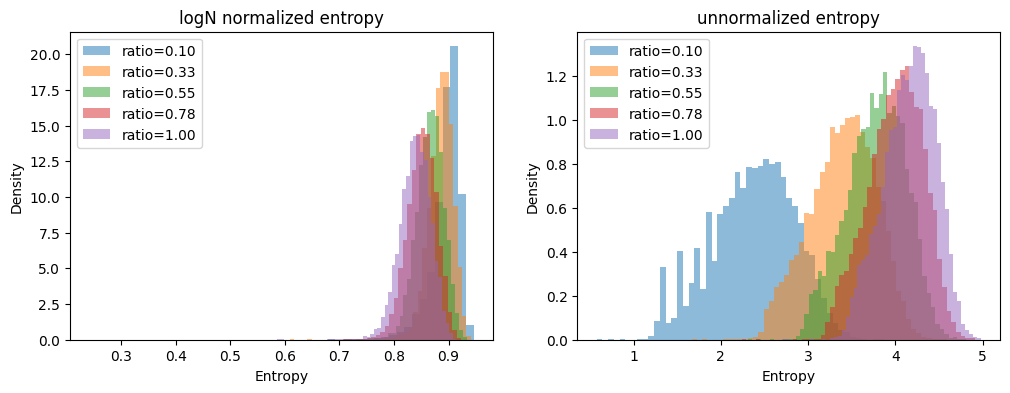

In [9]:
# plot the average entropy vs context length increases
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for context_length_ratio, context_length_entropy in zip(context_length_ratios, context_length_entropies):
    ax[0].hist(context_length_entropy['logN_normalized'], bins=50, density=True, alpha=0.5, label=f"ratio={context_length_ratio:.2f}")
    ax[1].hist(context_length_entropy['unnormalized'], bins=50, density=True, alpha=0.5, label=f"ratio={context_length_ratio:.2f}")

ax[0].set_title('logN normalized entropy')
ax[0].set_xlabel("Entropy")
ax[0].set_ylabel("Density")
ax[0].legend()

ax[1].set_title('unnormalized entropy')
ax[1].set_xlabel("Entropy")
ax[1].set_ylabel("Density")
ax[1].legend()

The above graph is pretty cool because the left and right sides have different trends. The left side roughly captures "entropy per word", which decreases as sentence lengths increase. The right side captures "total entropy", which increases as sentence lengths increase.

Below, I am plotting the average entropies vs context length

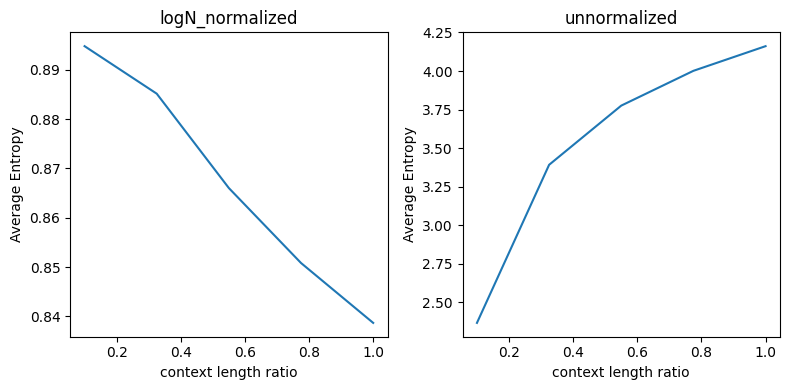

In [10]:
average_logD_entropies = [np.mean(context_length_entropy['logD_normalized']) for context_length_entropy in context_length_entropies]
average_logN_enropies = [np.mean(context_length_entropy['logN_normalized']) for context_length_entropy in context_length_entropies]
average_unnormalized_entropies = [np.mean(context_length_entropy['unnormalized']) for context_length_entropy in context_length_entropies]

fig, axes = plt.subplots(1, 2, figsize=(8,4))
keys = ['logN_normalized', 'unnormalized']
for ax, key in zip(axes.flatten(), keys):
    average_entropy = [np.mean(context_length_entropy[key]) for context_length_entropy in context_length_entropies]
    ax.plot(context_length_ratios, average_entropy)
    ax.set_title(key)
    ax.set_xlabel("context length ratio")
    ax.set_ylabel("Average Entropy")
    
plt.tight_layout()
plt.show()

# How does one word repeated many times behave?

Here I take the word "buffalo" and repeat it several times. The goal is to see how sentences constructed this way behave compared to regular sentences.

In [11]:
import random

special_word = "serat"
lengths = list(range(2, 100))
entropies = []

entropy_dict = {
        'unnormalized': [],
        'logN_normalized': [],
        'logD_normalized': [],
        'logNlogD_normalized': [],
        'lengths': []
    }

for length in lengths:
    input_string = ' '.join([special_word] * length)

    tokenized_string= tokenizer(input_string, truncation=False, return_tensors='pt')
    tokenized_string = {k: v.to(device) for k, v in tokenized_string.items()}

    with torch.no_grad():
        outputs = model(**tokenized_string)
        hidden_states = outputs.hidden_states
        N, D = hidden_states[0].shape[1:]

        last_hidden_state = normalize(outputs.last_hidden_state.squeeze())
        if N > D:
            cov = last_hidden_state.T @ last_hidden_state
        else:
            cov = (last_hidden_state @ last_hidden_state.T)
        cov /= torch.trace(cov)
        entropy = itl.matrixAlphaEntropy(cov, alpha=1)

        entropy_dict['unnormalized'].append(entropy.item())
        entropy_dict['logN_normalized'].append(entropy.item() / math.log(N))
        entropy_dict['logD_normalized'].append(entropy.item() / math.log(D))
        entropy_dict['logNlogD_normalized'].append(entropy.item() / (math.log(N)*math.log(D)))
        entropy_dict['lengths'].append(N)

Text(0.5, 0.98, "Entropy Behavior of Repeating 'serat'")

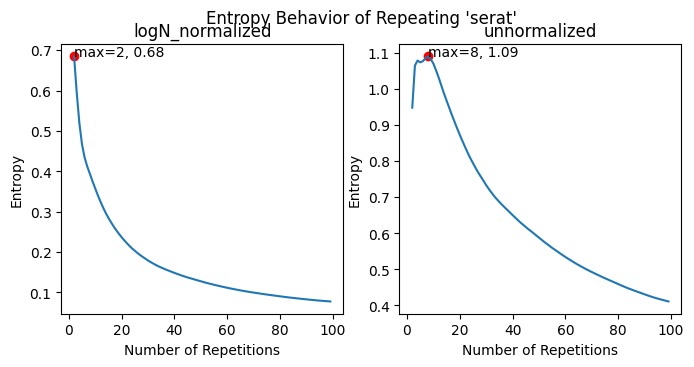

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))
keys = ['logN_normalized', 'unnormalized']
for ax, key in zip(axes.flatten(), keys):
    ax.plot(lengths, entropy_dict[key])
    ax.set_title(key)
    ax.set_xlabel("Number of Repetitions")
    ax.set_ylabel("Entropy")

    # show max point
    max_index = np.argmax(entropy_dict[key])
    ax.scatter(lengths[max_index], entropy_dict[key][max_index], color='red')
    ax.annotate(f"max={max_index+2}, {entropy_dict[key][max_index]:.2f}", (lengths[max_index], entropy_dict[key][max_index]))

fig.suptitle(f"Entropy Behavior of Repeating '{special_word}'")

# Entropy of Sentences with Random Words

In [13]:
import random

lengths = 200
number_of_random_sentences = 2

random_sentences = [[tokenizer.decode(random.randint(100, 30000)) for x in range(lengths)] for _ in range(number_of_random_sentences)]
random_sentences[1] = "Elden Ring contains crafting mechanics; the creation of items requires materials. Recipes, which are required for the crafting of items, can be found inside collectibles called cookbooks, which are scattered throughout the world. Materials can be collected by defeating enemies, exploring the game's world, or by trading with merchant NPCs. Crafted items include poison darts, exploding pots, and consumables that temporarily increase the player's combat strength.[17][18] Similar to the Dark Souls games, the player can summon friendly NPCs called spirits to fight enemies.[19] Summoning each type of spirit requires its equivalent Spirit Ash; different types of Spirit Ashes can be discovered as the player explores the game world. Spirits can only be summoned near structures called Rebirth Monuments, which are primarily found in large areas and inside boss fight arenas.[20] ".split(" ")
entropy_dict = [{
        'unnormalized': [],
        'logN_normalized': [],
        'logD_normalized': [],
        'logNlogD_normalized': [],
        'lengths': []
    } for _ in range(number_of_random_sentences)]

num_tokens = [[] for _ in range(number_of_random_sentences)]

for i in range(number_of_random_sentences):
    for length in range(2, lengths):
        input_string = ' '.join(random_sentences[i][:length])

        tokenized_string= tokenizer(input_string, truncation=False, return_tensors='pt')
        tokenized_string = {k: v.to(device) for k, v in tokenized_string.items()}

        with torch.no_grad():
            outputs = model(**tokenized_string)
            hidden_states = outputs.hidden_states
            N, D = hidden_states[0].shape[1:]
            num_tokens[i].append(N)
            
            last_hidden_state = normalize(outputs.last_hidden_state.squeeze())
            if N > D:
                cov = last_hidden_state.T @ last_hidden_state
            else:
                cov = (last_hidden_state @ last_hidden_state.T)
            cov /= torch.trace(cov)
            entropy = itl.matrixAlphaEntropy(cov, alpha=1)

            entropy_dict[i]['unnormalized'].append(entropy.item())
            entropy_dict[i]['logN_normalized'].append(entropy.item() / math.log(N))
            entropy_dict[i]['logD_normalized'].append(entropy.item() / math.log(D))
            entropy_dict[i]['logNlogD_normalized'].append(entropy.item() / (math.log(N)*math.log(D)))
            entropy_dict[i]['lengths'].append(N)

Text(0.5, 0.98, 'Entropy Behavior of Random Sentence')

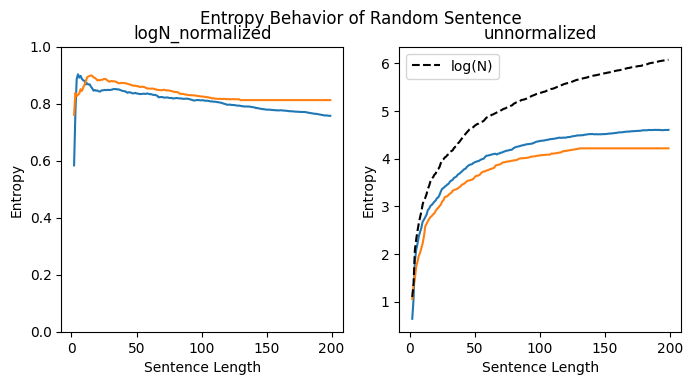

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3.7))
keys = ['logN_normalized', 'unnormalized']
for ax, key in zip(axes.flatten(), keys):
    for i in range(number_of_random_sentences):
        ax.plot(list(range(2, lengths)), entropy_dict[i][key])
    
    
    ax.set_title(key)
    ax.set_xlabel("Sentence Length")
    ax.set_ylabel("Entropy")

axes[0].set_ylim(0, 1)
axes[1].plot( list(range(2, 200)), np.log(num_tokens[0]), color='black', linestyle='--', label='log(N)')
axes[1].legend()
fig.suptitle(f"Entropy Behavior of Random Sentence")

The above graph is interesting because the overall entropy here is going down. This is a little strange, but kind of makes sense because increasing the number of repetitions doesn't add information

# Is there an eigenvector that encodes repetition?

Here I repeat the word "buffalo" 10 times. I embed the sentence and compute the covariance eigenvectors

In [15]:
special_word = "buffalo"

input_string = ' '.join([special_word] * 10)
tokenized_string= tokenizer(input_string, truncation=False, return_tensors='pt')
tokenized_string = {k: v.to(device) for k, v in tokenized_string.items()}

with torch.no_grad():
    outputs = model(**tokenized_string)
    hidden_states = outputs.hidden_states
    N, D = hidden_states[0].shape[1:]

    last_hidden_state = normalize(outputs.last_hidden_state.squeeze())

    cov = (last_hidden_state.T @ last_hidden_state)
    cov /= torch.trace(cov)
    entropy = itl.matrixAlphaEntropy(cov, alpha=1)

    # get eigs and vecs of cov
    eigs, vecs = torch.linalg.eigh(cov)
    eigs, indices = torch.sort(eigs, descending=True)
    vecs = vecs[:, indices].T


    buffalo_length_10_eigenvectors = vecs

So far we have the eigenvectors for the sentence "buffalo" repeated 10 times. Next we will see how those eigenvectors evolve as the number of repetitions increases. We will also see how they look on different words.

In [16]:
import numpy as np

special_words = ["buffalo", "oscar", "giraffe", "vehicle", "buff"]
lengths = list(range(10, 100))
entropies = []

repeated_eigenvals_over_time = np.zeros((len(special_words), D, len(lengths)))

with torch.no_grad():
    for word_idx, word in enumerate(special_words):
        for length in tqdm.tqdm(lengths):
            input_string = ' '.join([word] * length)
            tokenized_string= tokenizer(input_string, truncation=False, return_tensors='pt')
            tokenized_string = {k: v.to(device) for k, v in tokenized_string.items()}


            outputs = model(**tokenized_string)
            hidden_states = outputs.hidden_states
            N, D = hidden_states[0].shape[1:]

            last_hidden_state = normalize(outputs.last_hidden_state.squeeze())

            cov = (last_hidden_state.T @ last_hidden_state)
            cov /= torch.trace(cov)

            for vec_idx, vec in enumerate(buffalo_length_10_eigenvectors):
                # rayleigh quotient
                repeated_eigenvals_over_time[word_idx][vec_idx][length-10] = (vec.T @ cov @ vec) / (vec.T @ vec)

  0%|          | 0/90 [00:00<?, ?it/s]/tmp/ipykernel_420361/928814728.py:28: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3675.)
  repeated_eigenvals_over_time[word_idx][vec_idx][length-10] = (vec.T @ cov @ vec) / (vec.T @ vec)
100%|██████████| 90/90 [00:04<00:00, 20.35it/s]


Now we take the top 5 eigenvectors and see how they evolve for our repeated sentences and our dataset sentences as length increases.

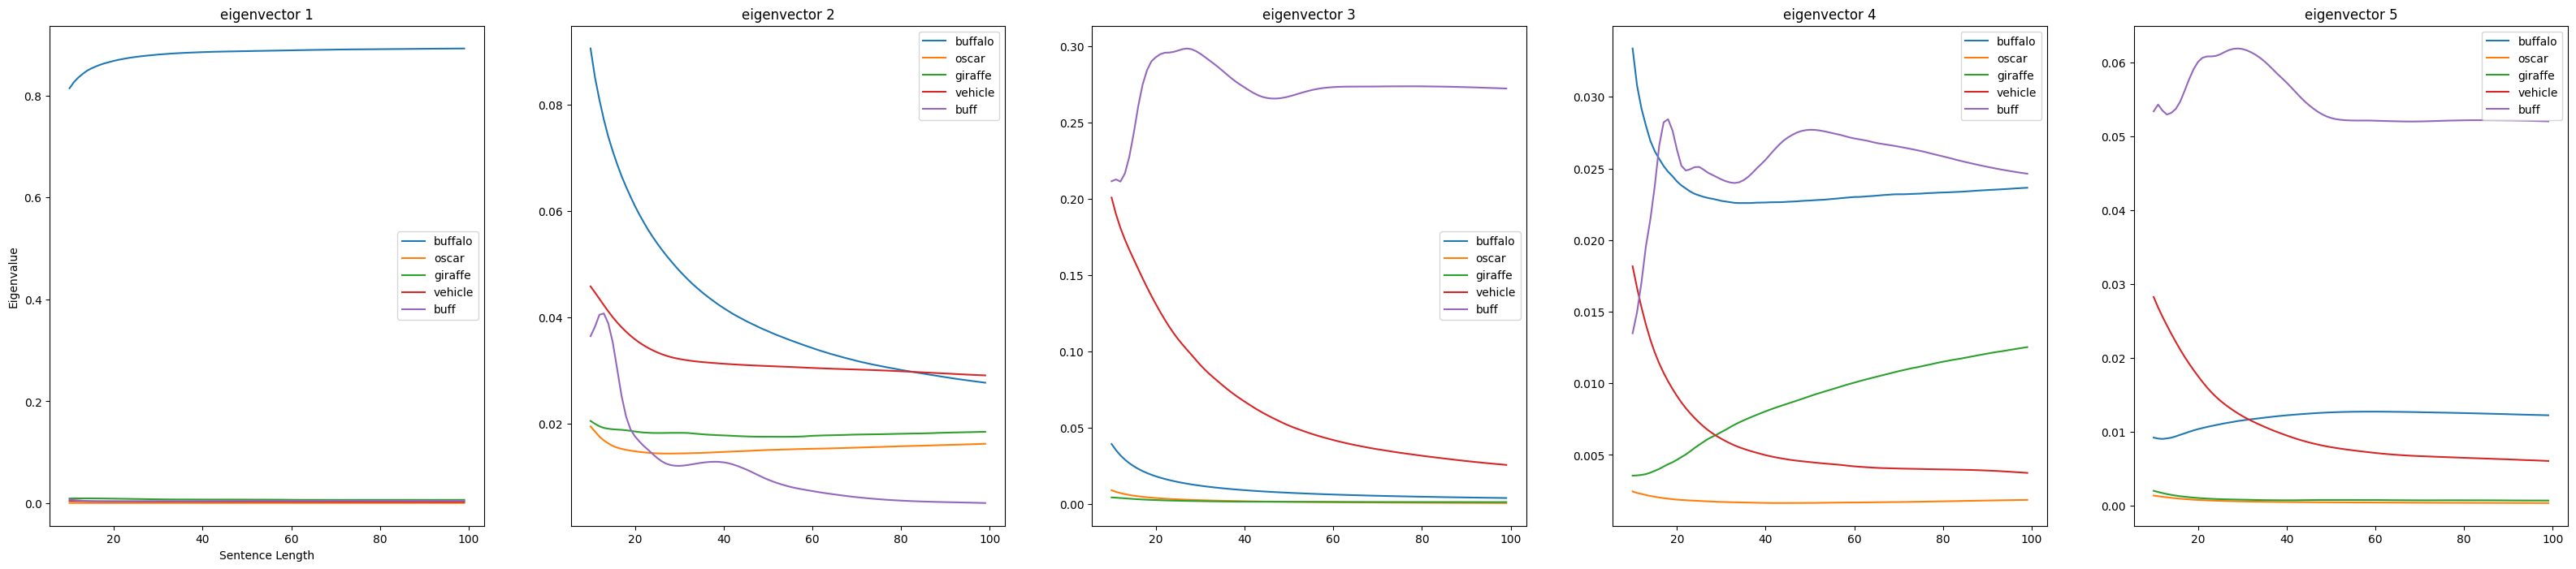

In [17]:
eig_idx_min, eig_idx_max = 0, 5

fig, axes = plt.subplots(1, eig_idx_max-eig_idx_min, figsize=( len(special_words)*8, 8))

for vec_idx in range(eig_idx_min, eig_idx_max):
    for word_idx, word in enumerate(special_words):
        axes[vec_idx-eig_idx_min].plot(lengths, repeated_eigenvals_over_time[word_idx][vec_idx], label=word)
    axes[vec_idx-eig_idx_min].legend()
    axes[vec_idx-eig_idx_min].set_title(f"eigenvector {vec_idx+1}")

    # all_average_entropies = [np.mean(x) for x in all_vals]
    # axes[1].scatter(lengths, all_average_entropies)

axes[0].set_xlabel("Sentence Length")
axes[0].set_ylabel("Eigenvalue")

plt.show()

# Lets take a look at how entropy changes as model size is increased

In [18]:
logN_sample_entropies = {k: [] for k in EleutherAI_sizes}
logD_sample_entropies = {k: [] for k in EleutherAI_sizes}
logNlogD_sample_entropies = {k: [] for k in EleutherAI_sizes}
unnormalized_sample_entropies = {k: [] for k in EleutherAI_sizes}

dimensionalities = {k: 0 for k in EleutherAI_sizes}

for model_size in EleutherAI_sizes:
    print("Running ", model_size)
    model_path = get_model_path("EleutherAI", model_size)

    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModel.from_pretrained(model_path, output_hidden_states=True).to(device)
    dataloader = get_dataloader(tokenizer, "wikitext", split="train", num_samples=10000)

    entropies = compute_entropies_for_each_sentence(model, dataloader, alpha=1)
    logN_sample_entropies[model_size] = entropies['logN_normalized']
    logD_sample_entropies[model_size] = entropies['logD_normalized']
    logNlogD_sample_entropies[model_size] = entropies['logNlogD_normalized']
    unnormalized_sample_entropies[model_size] = entropies['unnormalized']

    # get dimensionality of model
    with torch.no_grad():
        outputs = model(torch.zeros(1, 1).long().to(device))
        D = outputs.last_hidden_state.shape[-1]
        dimensionalities[model_size] = D

/home/AD/ofsk222/miniconda3/envs/information_plane/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running  14m


100%|██████████| 4781/4781 [00:37<00:00, 126.28it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running  70m


100%|██████████| 4781/4781 [00:43<00:00, 109.27it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running  160m


100%|██████████| 4781/4781 [01:08<00:00, 69.49it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running  410m


100%|██████████| 4781/4781 [02:01<00:00, 39.23it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running  1b


100%|██████████| 4781/4781 [02:36<00:00, 30.54it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running  1.4b


100%|██████████| 4781/4781 [03:34<00:00, 22.27it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running  2.8b


100%|██████████| 4781/4781 [06:43<00:00, 11.84it/s]


{'14m': [3.8692543506622314, 3.6328611373901367, 2.339193820953369, 3.885383129119873, 2.878840684890747, 3.8566737174987793, 3.889009952545166, 3.6795926094055176, 3.9224884510040283, 3.8953118324279785, 2.8657093048095703, 3.697323799133301, 3.654961109161377, 3.722017288208008, 3.8673248291015625, 1.33971107006073, 3.8929708003997803, 3.799168348312378, 3.7857189178466797, 3.654536247253418, 3.9040327072143555, 3.9614477157592773, 3.7439045906066895, 2.4874210357666016, 2.6573739051818848, 3.763307571411133, 3.7938902378082275, 4.0495524406433105, 3.8325979709625244, 3.0270471572875977, 3.932511329650879, 3.8484456539154053, 3.4428045749664307, 2.8652758598327637, 3.606024742126465, 3.43864369392395, 3.7844247817993164, 3.986207962036133, 2.713808059692383, 3.8599557876586914, 3.362621784210205, 3.8816514015197754, 1.605427861213684, 3.9615771770477295, 3.8635666370391846, 3.855802059173584, 3.0777132511138916, 3.4868011474609375, 3.731959819793701, 2.448124647140503, 3.732563495635

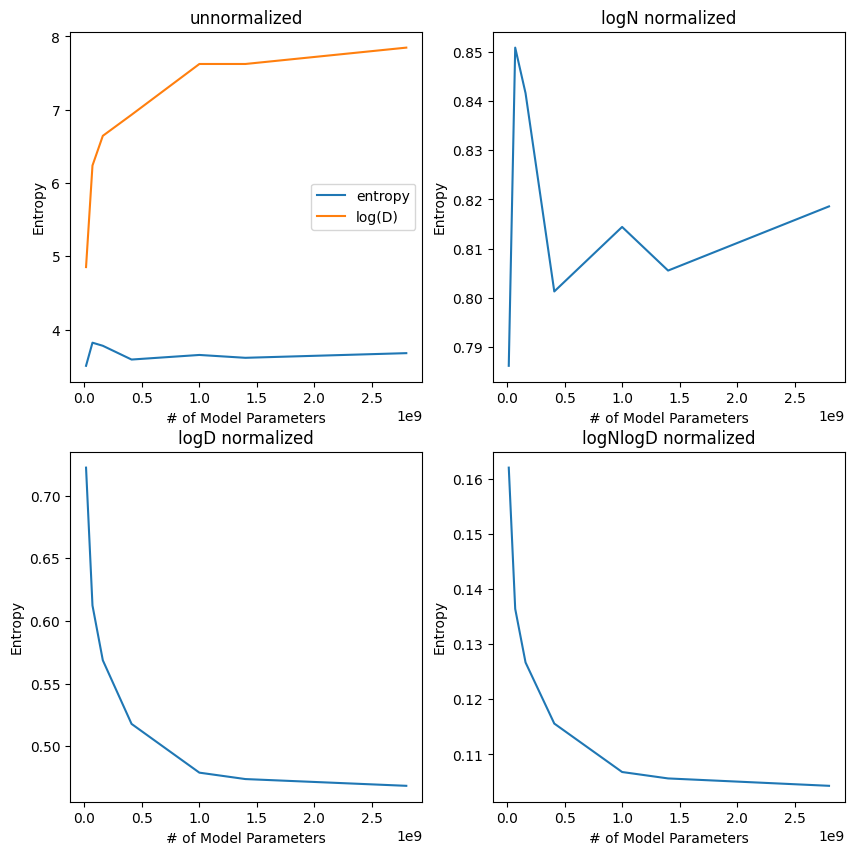

In [19]:
logN_average_entropies = [np.mean(logN_sample_entropies[k]) for k in logN_sample_entropies.keys()]
logD_average_entropies = [np.mean(logD_sample_entropies[k]) for k in logD_sample_entropies.keys()]
logNlogD_average_entropies = [np.mean(logNlogD_sample_entropies[k]) for k in logNlogD_sample_entropies.keys()]
unnormalized_average_entropies = [np.mean(unnormalized_sample_entropies[k]) for k in unnormalized_sample_entropies.keys()]

print(unnormalized_sample_entropies)
model_params = [int(x[:-1])*10**6 for x in ['14m', '70m', '160m', '410m', '1000m', '1400m', '2800m',]]#if x[-1]=='m' else x[:-1]*10**7]

fig, axes = plt.subplots(2, 2, figsize=(10,10))
print(np.mean(unnormalized_sample_entropies['14m']))

axes[0][0].plot(model_params, unnormalized_average_entropies, label="entropy")
axes[0][0].plot(model_params, np.log(list(dimensionalities.values())), label="log(D)")
axes[0][0].set_title("unnormalized")
axes[0][0].set_xlabel("# of Model Parameters")
axes[0][0].set_ylabel("Entropy")
axes[0][0].legend()

axes[0][1].plot(model_params, logN_average_entropies)
axes[0][1].set_title("logN normalized")
axes[0][1].set_xlabel("# of Model Parameters")
axes[0][1].set_ylabel("Entropy")

axes[1][0].plot(model_params, logD_average_entropies)
axes[1][0].set_title("logD normalized")
axes[1][0].set_xlabel("# of Model Parameters")
axes[1][0].set_ylabel("Entropy")

axes[1][1].plot(model_params, logNlogD_average_entropies)
axes[1][1].set_title("logNlogD normalized")
axes[1][1].set_xlabel("# of Model Parameters")
axes[1][1].set_ylabel("Entropy")

plt.show()